# Library

In [1]:
import tensorflow  as tf
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import random

In [ ]:
from textblob import TextBlob
from nltk.tokenize.toktok import ToktokTokenizer
import re
tokenizer=ToktokTokenizer()
import spacy
from string import punctuation

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy

nltk.download('stopwords')
nltk.download('punkt',download_dir ='model/nltk_data')
nltk.download('wordnet', download_dir ='model/nltk_data')
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt_tab')

nlp=spacy.load('en_core_web_sm',disable=['ner'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tazkiiia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tazkiiia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to model/nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Tazkiiia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Courses

In [3]:
# read the data
courses= pd.read_csv(r'D:\Recommender_System_Courses_web\dataset\Coursera_courses.csv')
courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


# Rating

In [4]:
# read the dataset
data_ratings = pd.read_csv(r'D:\Recommender_System_Courses_web\dataset\Coursera_reviews.csv')
data_ratings.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [5]:
data_ratings.drop(labels = 'date_reviews', inplace=True, axis = 1)
unknown_reviewer_df = data_ratings[~(data_ratings['reviewers'].str.startswith('By'))]
unknown_reviewer_df

,reviews,reviewers,rating,course_id
732410,The ethics unit examples were interesting. Th...,Started Oct 05,4,intro-to-healthcare
732413,Wonderfully done,Started Oct 05,4,intro-to-healthcare
1046787,My certificate does not want to be released,Started Sep 28,1,entrepreneurship-strategy
1046790,knowing who you are? give me a break...,Started Sep 28,1,entrepreneurship-strategy
1236372,"boring lecturer, monotone, passionless reading...",No Upcoming Session Available,1,epigenetics
1236375,the whole lecture given by the lecturer is so ...,No Upcoming Session Available,1,epigenetics
1259484,hola! me gustaría darme de baja de este curso....,Started Oct 05,1,social-economic-networks
1259487,"Without previous knowledge in math, this cours...",Started Oct 05,1,social-economic-networks
1262903,How can you attend yo course which does not up...,Started Oct 05,1,curanderismo-plants
1262906,"The course is not what I expected, and I would...",Started Oct 05,1,curanderismo-plants


In [6]:
num_of_reviews_by_course_df = data_ratings['course_id'].value_counts().reset_index()
more_500_reviews_df = num_of_reviews_by_course_df[num_of_reviews_by_course_df['count'] > 500]
more_500_reviews_df

,course_id,count
0,python,45218
1,machine-learning,35895
2,neural-networks-deep-learning,35750
3,technical-support-fundamentals,35319
4,python-data,33546
...,...,...
413,getting-started-with-google-sheets,517
414,quality-healthcare,516
415,process-mining,514
416,international-taxation,513


In [7]:
# Ambil kursus yang hanya memiliki lebih dari 500 reviews
new_reviews_df = data_ratings[data_ratings['course_id']\
                                .isin(set(more_500_reviews_df['course_id']))]

# Ambil data yang reviewernya diawali dengan 'By' kecuali 'By Deleted A'
data_ratings = data_ratings[(data_ratings['reviewers'].str.contains('By')) &
                                (data_ratings['reviewers']!='By Deleted A')]

# Hapus data yang memiliki nilai null
data_ratings.dropna(inplace=True)

# Hapus data duplikat
data_ratings.drop_duplicates(inplace=True)

data_ratings.head()

,reviews,reviewers,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training


In [8]:
data_ratings['reviewers'] = data_ratings['reviewers']\
                      .apply(lambda x: ' '.join(x.split(' ')[1:]))
data_ratings.head()

,reviews,reviewers,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",Robert S,4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,Gabriel E R,4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,Jacob D,4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,Dale B,4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,Sean G,4,google-cbrs-cpi-training


In [9]:
merged_df = pd.merge(courses[['name','course_url','course_id']],
                     data_ratings,
                     on='course_id')

merged_df.head()

,name,course_url,course_id,reviews,reviewers,rating
0,Machine Learning,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,Bruno C,1
1,Machine Learning,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",Fadi,1
2,Machine Learning,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,Mathew L,1
3,Machine Learning,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",Rui C,1
4,Machine Learning,https://www.coursera.org/learn/machine-learning,machine-learning,Too many trainings and assignments without eno...,Mehdi A,1


# Merge Data

In [10]:
data_prep_df = merged_df.copy()

users_list = data_prep_df['reviewers'].unique().tolist()
courses_list = data_prep_df['course_id'].unique().tolist()

# Encode users dan courses
users_encoded = {user: i+1 for i, user in enumerate(users_list)}
courses_encoded = {course: i+1 for i, course in enumerate(courses_list)}

# Decode users dan courses
users_decoded = {i+1: user for i, user in enumerate(users_list)}
courses_decoded = {i+1: course for i, course in enumerate(courses_list)}

In [11]:
data_prep_df['user_id'] = data_prep_df['reviewers'].map(users_encoded)
data_prep_df['course_id'] = data_prep_df['course_id'].map(courses_encoded)

data_prep_df.head()

,name,course_url,course_id,reviews,reviewers,rating,user_id
0,Machine Learning,https://www.coursera.org/learn/machine-learning,1,The course is ok but the certification procedu...,Bruno C,1,1
1,Machine Learning,https://www.coursera.org/learn/machine-learning,1,"I just started week 3 , I have to admit that I...",Fadi,1,2
2,Machine Learning,https://www.coursera.org/learn/machine-learning,1,This course is absolute garbage. You get no f...,Mathew L,1,3
3,Machine Learning,https://www.coursera.org/learn/machine-learning,1,"However good the material and lectures may be,...",Rui C,1,4
4,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Too many trainings and assignments without eno...,Mehdi A,1,5


In [ ]:
#  save the final file
# Save the DataFrame as a CSV file to the specified folder
# data_prep_df.to_csv(r'D:\Recommender_System_Courses_web\dataset\final_data.csv', index=False)


# Preprocessing

In [13]:
# read the data
df = pd.read_csv(r'D:\Recommender_System_Courses_web\dataset\final_data.csv')
df.head(5)

,name,course_url,course_id,reviews,reviewers,rating,user_id
0,Machine Learning,https://www.coursera.org/learn/machine-learning,1,The course is ok but the certification procedu...,Bruno C,1,1
1,Machine Learning,https://www.coursera.org/learn/machine-learning,1,"I just started week 3 , I have to admit that I...",Fadi,1,2
2,Machine Learning,https://www.coursera.org/learn/machine-learning,1,This course is absolute garbage. You get no f...,Mathew L,1,3
3,Machine Learning,https://www.coursera.org/learn/machine-learning,1,"However good the material and lectures may be,...",Rui C,1,4
4,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Too many trainings and assignments without eno...,Mehdi A,1,5


In [14]:
df.dtypes

name          object
course_url    object
course_id      int64
reviews       object
reviewers     object
rating         int64
user_id        int64
dtype: object

In [15]:
df.isnull().sum()

name          0
course_url    0
course_id     0
reviews       0
reviewers     3
rating        0
user_id       0
dtype: int64

In [ ]:
def clean_text(series):
    series = series.apply(lambda x:  re.sub(r'_+', ' ', x))
    series = series.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
    series = series.str.lower()
    series = series.apply(lambda x: ''.join([c for c in x if c not in punctuation]))
    series = series.apply(lambda x: re.sub(r'\d+', '', x))
    series = series.str.strip()
    series = series.apply(lambda x: re.sub(' +', ' ', x))

    return series
df['reviews']=clean_text(df['reviews'])
df.head()

,name,course_url,course_id,reviews,reviewers,rating,user_id
0,Machine Learning,https://www.coursera.org/learn/machine-learning,1,the course is ok but the certification procedu...,Bruno C,1,1
1,Machine Learning,https://www.coursera.org/learn/machine-learning,1,i just started week i have to admit that it is...,Fadi,1,2
2,Machine Learning,https://www.coursera.org/learn/machine-learning,1,this course is absolute garbage you get no fee...,Mathew L,1,3
3,Machine Learning,https://www.coursera.org/learn/machine-learning,1,however good the material and lectures may be ...,Rui C,1,4
4,Machine Learning,https://www.coursera.org/learn/machine-learning,1,too many trainings and assignments without eno...,Mehdi A,1,5


In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

df['reviews'] = df['reviews'].apply(remove_stopwords)
df.head()

,name,course_url,course_id,reviews,reviewers,rating,user_id
0,Machine Learning,https://www.coursera.org/learn/machine-learning,1,course ok certification procedure messno state...,Bruno C,1,1
1,Machine Learning,https://www.coursera.org/learn/machine-learning,1,started week admit good course explaining idea...,Fadi,1,2
2,Machine Learning,https://www.coursera.org/learn/machine-learning,1,course absolute garbage get feedback quizzes a...,Mathew L,1,3
3,Machine Learning,https://www.coursera.org/learn/machine-learning,1,however good material lectures may use outdate...,Rui C,1,4
4,Machine Learning,https://www.coursera.org/learn/machine-learning,1,many trainings assignments without enough prac...,Mehdi A,1,5


In [ ]:
def lemmatize_text(text):
    text=nlp(text)
    text= ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
df['reviews'] = df['reviews'].apply(lemmatize_text)
df.head()

,name,course_url,course_id,reviews,reviewers,rating,user_id
0,Machine Learning,https://www.coursera.org/learn/machine-learning,1,course ok certification procedure messno state...,Bruno C,1,1
1,Machine Learning,https://www.coursera.org/learn/machine-learning,1,start week admit good course explain idea hypn...,Fadi,1,2
2,Machine Learning,https://www.coursera.org/learn/machine-learning,1,course absolute garbage get feedback quiz assi...,Mathew L,1,3
3,Machine Learning,https://www.coursera.org/learn/machine-learning,1,however good material lecture may use outdated...,Rui C,1,4
4,Machine Learning,https://www.coursera.org/learn/machine-learning,1,many training assignment without enough practi...,Mehdi A,1,5


In [ ]:
df.to_csv('cleaned_reviews.csv', index=False)

# Sentiment using VADER

In [16]:
df = pd.read_csv(r'D:\Recommender_System_Courses_web\dataset\cleaned_reviews.csv')
df.head(5)

,name,course_url,course_id,reviews,reviewers,rating,user_id
0,Machine Learning,https://www.coursera.org/learn/machine-learning,1,course ok certification procedure messno state...,Bruno C,1,1
1,Machine Learning,https://www.coursera.org/learn/machine-learning,1,start week admit good course explain idea hypn...,Fadi,1,2
2,Machine Learning,https://www.coursera.org/learn/machine-learning,1,course absolute garbage get feedback quiz assi...,Mathew L,1,3
3,Machine Learning,https://www.coursera.org/learn/machine-learning,1,however good material lecture may use outdated...,Rui C,1,4
4,Machine Learning,https://www.coursera.org/learn/machine-learning,1,many training assignment without enough practi...,Mehdi A,1,5


In [ ]:
# pip install vaderSentiment


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_compound_score(text):
    if isinstance(text, float):  
        text = str(text)  
    vs = analyzer.polarity_scores(text)
    return vs['compound']

df['reviews'] = df['reviews'].fillna('')
df['compound'] = df['reviews'].apply(get_compound_score)

# Function to classify sentiment into Positive, Neutral, Negative
def classify_sentiment(compound):
    if compound > 0.001:
        return 'Positive', 1
    elif -0.001 < compound < 0.001:
        return 'Neutral', 0
    else:
        return 'Negative', -1

# Apply the overall sentiment classification
df[['Sentiment', 'polarity']] = df['compound'].apply(lambda x: pd.Series(classify_sentiment(x)))

# Function to classify sentiment into an integer value from 1 to 5
def refined_sentiment_classification(vader_compound_score):
    if vader_compound_score >= -1 and vader_compound_score < -0.5:
        return 1
    elif vader_compound_score >= -0.5 and vader_compound_score < -0.05:
        return 2
    elif vader_compound_score >= -0.05 and vader_compound_score <= 0.05:
        return 3
    elif vader_compound_score > 0.05 and vader_compound_score < 0.5:
        return 4
    else:
        return 5

# Apply the refined sentiment classification
df['refined_sentiment'] = df['compound'].apply(refined_sentiment_classification)




In [19]:
df.head(5)

,name,course_url,course_id,reviews,reviewers,rating,user_id,compound,Sentiment,polarity,refined_sentiment
0,Machine Learning,https://www.coursera.org/learn/machine-learning,1,course ok certification procedure messno state...,Bruno C,1,1,0.3612,Positive,1,4
1,Machine Learning,https://www.coursera.org/learn/machine-learning,1,start week admit good course explain idea hypn...,Fadi,1,2,0.8360,Positive,1,5
2,Machine Learning,https://www.coursera.org/learn/machine-learning,1,course absolute garbage get feedback quiz assi...,Mathew L,1,3,-0.8555,Negative,-1,1
3,Machine Learning,https://www.coursera.org/learn/machine-learning,1,however good material lecture may use outdated...,Rui C,1,4,0.4404,Positive,1,4
4,Machine Learning,https://www.coursera.org/learn/machine-learning,1,many training assignment without enough practi...,Mehdi A,1,5,-0.2263,Negative,-1,2


In [20]:
df = df.drop(columns=['compound', 'polarity'])
df.head()

,name,course_url,course_id,reviews,reviewers,rating,user_id,Sentiment,refined_sentiment
0,Machine Learning,https://www.coursera.org/learn/machine-learning,1,course ok certification procedure messno state...,Bruno C,1,1,Positive,4
1,Machine Learning,https://www.coursera.org/learn/machine-learning,1,start week admit good course explain idea hypn...,Fadi,1,2,Positive,5
2,Machine Learning,https://www.coursera.org/learn/machine-learning,1,course absolute garbage get feedback quiz assi...,Mathew L,1,3,Negative,1
3,Machine Learning,https://www.coursera.org/learn/machine-learning,1,however good material lecture may use outdated...,Rui C,1,4,Positive,4
4,Machine Learning,https://www.coursera.org/learn/machine-learning,1,many training assignment without enough practi...,Mehdi A,1,5,Negative,2


In [21]:
df = df.sample(frac=1, random_state=42)
df.head()

,name,course_url,course_id,reviews,reviewers,rating,user_id,Sentiment,refined_sentiment
243441,Introductory Human Physiology,https://www.coursera.org/learn/physiology,82,really perfect course really enjoy thank much,Rishikesh D,5,156321,Positive,5
505021,Machine Learning Foundations: A Case Study App...,https://www.coursera.org/learn/ml-foundations,554,great,Md. R Q S,5,19402,Positive,5
467766,Object-Oriented Design,https://www.coursera.org/learn/object-oriented...,437,interesting course well organize,ALESSANDRO S,5,244177,Positive,5
93921,Successful Negotiation: Essential Strategies a...,https://www.coursera.org/learn/negotiation-skills,15,first big thank coursera give opportunity mill...,NOORUDDIN T,5,71606,Positive,5
431323,"Capstone: Retrieving, Processing, and Visualiz...",https://www.coursera.org/learn/python-data-vis...,361,assignment easy expect least code change,Remo L,4,131006,Positive,4


In [22]:
df.to_csv('data_fixed.csv', index=False)


# Modeling

In [23]:
df = pd.read_csv(r'D:\Recommender_System_Courses_web\dataset\data_fixed.csv')
df.head(5)

,name,course_url,course_id,reviews,reviewers,rating,user_id,Sentiment,refined_sentiment
0,Introductory Human Physiology,https://www.coursera.org/learn/physiology,82,really perfect course really enjoy thank much,Rishikesh D,5,156321,Positive,5
1,Machine Learning Foundations: A Case Study App...,https://www.coursera.org/learn/ml-foundations,554,great,Md. R Q S,5,19402,Positive,5
2,Object-Oriented Design,https://www.coursera.org/learn/object-oriented...,437,interesting course well organize,ALESSANDRO S,5,244177,Positive,5
3,Successful Negotiation: Essential Strategies a...,https://www.coursera.org/learn/negotiation-skills,15,first big thank coursera give opportunity mill...,NOORUDDIN T,5,71606,Positive,5
4,"Capstone: Retrieving, Processing, and Visualiz...",https://www.coursera.org/learn/python-data-vis...,361,assignment easy expect least code change,Remo L,4,131006,Positive,4


In [30]:
EMBEDDING_SIZE = 100
# IMPORTANT : pleae read the documentation for register the custom class model to avoid error
# documentation for custom class : https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/serialization_and_saving.ipynb#config_methods
# clear the previoues custom objects
keras.saving.get_custom_objects().clear()
# register the custom layer 
@keras.saving.register_keras_serializable(package="RecomendationLayer")
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_courses, embedding_size, **kwargs):
        super().__init__(**kwargs)
        self.num_users = num_users
        self.num_courses = num_courses
        self.embedding_size = embedding_size
        self.dense1 = tf.keras.layers.Dense(128, activation="relu")
        self.dense2 = tf.keras.layers.Dense(64, activation="relu")
        self.dense3 = tf.keras.layers.Dense(1, activation="sigmoid")
        self.user_embedding = tf.keras.layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6),
        )
        self.user_bias = tf.keras.layers.Embedding(num_users, 1)
        self.food_embedding = tf.keras.layers.Embedding(
            num_courses,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer= tf.keras.regularizers.l2(1e-6),
        )
        self.food_bias = tf.keras.layers.Embedding(num_courses, 1)
    
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        food_vector = self.food_embedding(inputs[:, 1])
        food_bias = self.food_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, food_vector, 2)
        x = dot_user_movie + user_bias + food_bias
        dense_layer1 = self.dense1(x)
        dense_layer2 = self.dense2(dense_layer1)
        return self.dense3(dense_layer2)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "num_users": self.num_users,
            "num_courses": self.num_courses,
            "embedding_size": self.embedding_size,
        })
        return config
    
    @classmethod
    def from_config(cls, config):
        return  cls( **config)


In [31]:
# for dataframe use apply
def get_train_test_data(df : pd.DataFrame): 
    x = df[['user_id', 'course_id']].values
    train_len = int(0.98 * df.shape[0])
    max_rating = max(df["refined_sentiment"])
    y = df['refined_sentiment'].apply(lambda x: x / max_rating).values
    x_train, x_test, y_train, y_test = (
        x[:train_len],
        x[train_len:],
        y[:train_len],
        y[train_len:],
    )
    return x_train, x_test, y_train, y_test 

def get_course_user_len(df : pd.DataFrame): 
    len_user = len(df['user_id'].unique().tolist())
    len_courses = len(df['course_id'].unique().tolist())
    return len_user, len_courses

def create_and_train_model(x_train, x_test, y_train, y_test, len_user, len_courses): 
    model = RecommenderNet(len_user + 1, len_courses + 1, EMBEDDING_SIZE)
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer='adam',
        metrics = [tf.keras.metrics.MeanSquaredError()]
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=1024,
        epochs=20,
        verbose=1,
        validation_data=(x_test, y_test),

    )
    return model, history 

def display_predictiom(model, x_test, y_test, nums = 10):
    pred = model.predict(x_test)
    for i in range(nums): 
        print(f'predict : {pred[i] * 5.0}')
        print(f'actual : {y_test[i] *  5.0}')
        print('====================================')
    return pred


len_user, len_courses = get_course_user_len(df)
x_train, x_test, y_train, y_test  = get_train_test_data(df)
model, history = create_and_train_model(x_train, x_test, y_train, y_test, len_user, len_courses)
model.save("recommendation_model.keras")
display_predictiom(model, x_test, y_test, 20)


Epoch 1/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 164s 324ms/step - loss: 0.4440 - mean_squared_error: 0.0591 - val_loss: 0.3712 - val_mean_squared_error: 0.0273
Epoch 2/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 160s 322ms/step - loss: 0.3968 - mean_squared_error: 0.0335 - val_loss: 0.4117 - val_mean_squared_error: 0.0343
Epoch 3/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 159s 321ms/step - loss: 0.3849 - mean_squared_error: 0.0309 - val_loss: 0.3985 - val_mean_squared_error: 0.0327
Epoch 4/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 159s 321ms/step - loss: 0.3847 - mean_squared_error: 0.0309 - val_loss: 0.3882 - val_mean_squared_error: 0.0313
Epoch 5/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 160s 322ms/step - loss: 0.3846 - mean_squared_error: 0.0307 - val_loss: 0.3817 - val_mean_squared_error: 0.0298
Epoch 6/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 160s 323ms/step - loss: 0.3857 - mean_squared_error: 0.0306 - val_loss: 0.3825 - val_mean_squared_error: 0.0295
Epoch 7/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 161s 325ms/step - loss: 0.3872 - mean_squared_er

array([[0.95523965],
       [0.83449537],
       [0.966384  ],
       ...,
       [0.950171  ],
       [0.9698443 ],
       [0.97452617]], dtype=float32)

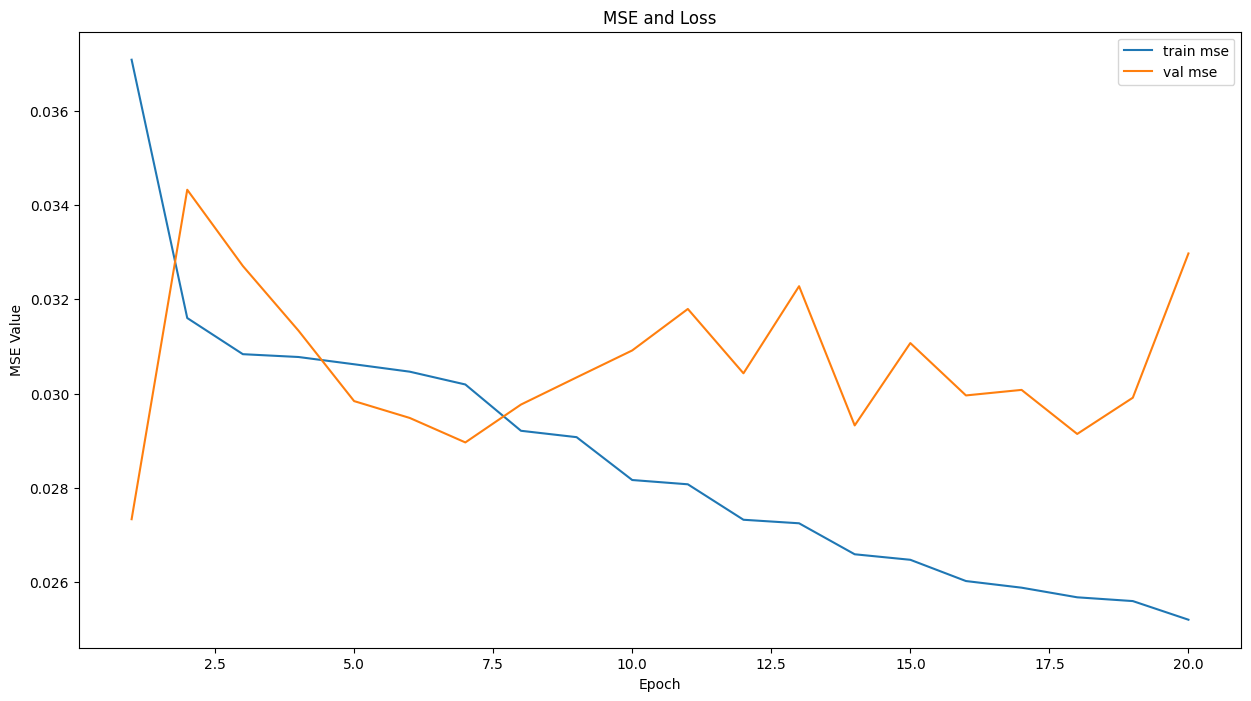

In [32]:
epochs = len(history.history['mean_squared_error'])  # Get the number of epochs from the data

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(15, 8))
ax1.plot([x for x in range(1, epochs + 1)], history.history['mean_squared_error'], label = "train mse")
ax1.plot([x for x in range(1, epochs + 1)], history.history['val_mean_squared_error'], label = "val mse")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('MSE Value')
ax1.set_title("MSE and Loss")
ax1.legend()
plt.show()


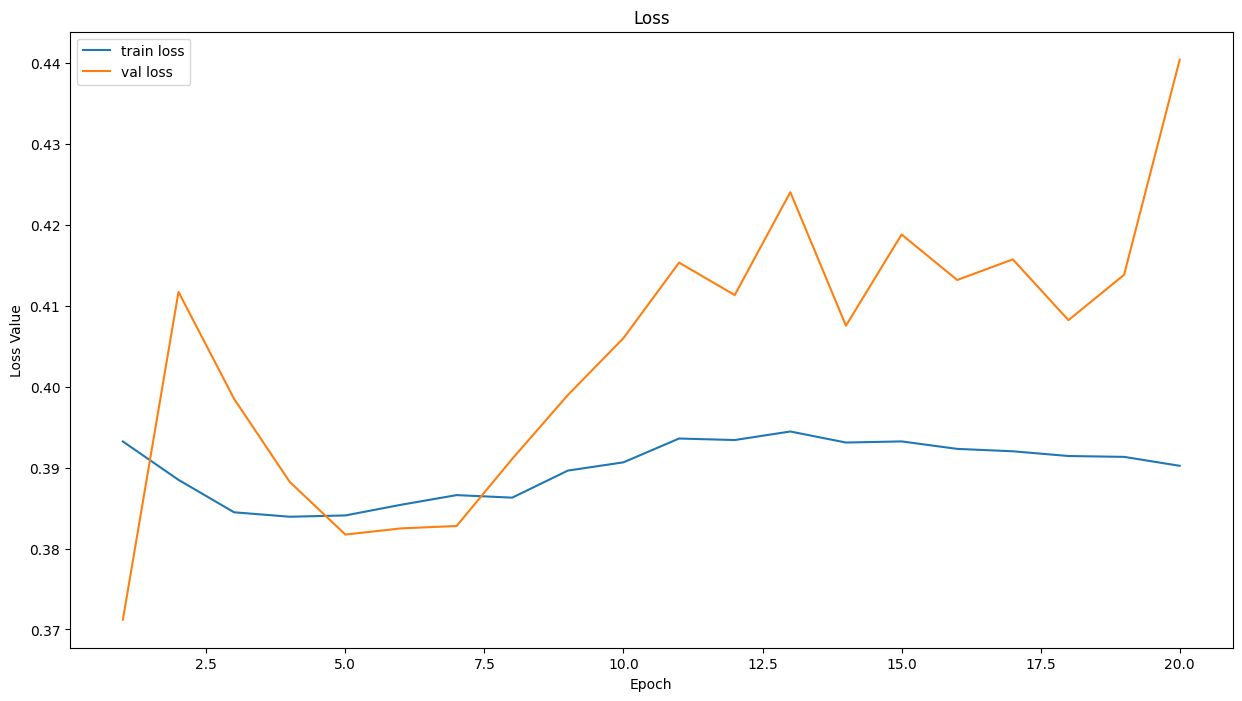

In [33]:
epochs = len(history.history['loss'])  # Get the actual number of epochs

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(15, 8))
ax1.plot([x for x in range(1, epochs + 1)], history.history['loss'], label = "train loss")
ax1.plot([x for x in range(1, epochs + 1)], history.history['val_loss'], label = "val loss")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss Value')
ax1.set_title("Loss")
ax1.legend()
plt.show()


In [34]:
# load custom model 
reconstructed_model = keras.models.load_model(
    "./recommendation_model.keras",
    custom_objects={"RecomendationLayer": RecommenderNet}
)
#  dping prediction
print(len(reconstructed_model.predict(x_test)))


324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
10359


In [35]:

data2 = pd.read_csv(r'D:\Recommender_System_Courses_web\dataset\cleaned_reviews.csv')
data2.drop_duplicates(subset=['course_id'], inplace = True)
data2.shape

(604, 7)

In [40]:
def prediction_for_spesific_user(model, df: pd.DataFrame): 
    # random user_id
    user_id = random.randint(a = 9999, b = 99999)
    all_prediction = []
    # recipe_id_uniques = np.unique(df.loc[:, 'resep_id'])
    for i in range(df.shape[0]): 
        print(f'Course id : {i}')
        all_prediction.append(model.predict(np.array([[user_id, i]]))[0][0] * 5)
    # this will sort the ratings from higher to lower
    all_prediction = np.argsort(all_prediction)[::-1]
    return all_prediction 

def list_of_recomendation_courses(index, df: pd.DataFrame):
    # the final recomendation
    courses = []
    for i in index: 
        courses.append(df.iloc[i]['name'])
    return courses


In [41]:
index = prediction_for_spesific_user(reconstructed_model, data2)

Course id : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Course id : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Course id : 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Course id : 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Course id : 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Course id : 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Course id : 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Course id : 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Course id : 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Course id : 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Course id : 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Course id : 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Course id : 12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Course id : 13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Course id : 14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Course id : 15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Course id : 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Course id : 17
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Course id : 18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Cou

In [42]:
courses =list_of_recomendation_courses(index, data2)
courses

['Indigenous Canada',
 'Technical Support Fundamentals',
 'Google Cloud Platform Fundamentals: Core Infrastructure',
 'Introduction to Negotiation: A Strategic Playbook for Becoming a Principled and Persuasive Negotiator',
 'Business Model Innovation',
 'What is Data Science?',
 'The Bits and Bytes of Computer Networking',
 'Initiating and Planning Projects',
 'English for Career Development',
 'Stanford Introduction to Food and Health',
 'Introduction to the Biology of Cancer',
 'Programming Fundamentals',
 'AI for Medical Prognosis',
 'Introduction to Programming with MATLAB',
 'Introduction to Social Media Marketing',
 'Programming Foundations with JavaScript, HTML and CSS',
 'Programming for Everybody (Getting Started with Python)',
 'Everyday Excel, Part 1',
 'Private Equity and Venture Capital',
 'Drug Commercialization',
 'Sports Marketing',
 'Writing in the Sciences',
 'Python Data Structures',
 'Astronomy: Exploring Time and Space',
 'Marketing in a Digital World',
 'Réussir l

In [43]:
iter = 0
for i in data2['name']: 
    if i == "machine learning": 
        print(iter)
        break
    iter += 1

In [44]:
# print(len(reconstructed_model.predict(x_test)))
reconstructed_model.predict(np.array([[1000,21]])) * 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[4.831432]], dtype=float32)